### 计算机模拟HW4
**3180105843 汪奕晨**

In [14]:
from scipy import stats
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.io as scio
import time

In [68]:
def swapcities(cityXY):
    n = cityXY.shape[1]
    city = np.random.choice(n, 2, False)
    city_1 = min(city)
    city_2 = max(city)

    s = np.hstack((cityXY[:,0: city_1], cityXY[:,city_2:city_1:-1]))
    # print(s.shape)
    s = np.hstack((s, cityXY[:,city_1:city_1 + 1]))
    # print(s.shape)
    s = np.hstack((s, cityXY[:,city_2 + 1:]))
    # print(s.shape)
    return s

    # s0 = np.append(cityXY[0,0: city_1], cityXY[0,city_2:city_1:-1])
    # s1 = np.append(cityXY[1,0: city_1], cityXY[1,city_2:city_1:-1])
    # s0 = np.append(s0, cityXY[0,city_1])
    # s1 = np.append(s1, cityXY[1,city_1])
    # s0 = np.append(s0, cityXY[0,city_2 + 1:])
    # s1 = np.append(s1, cityXY[1,city_2 + 1:])
    # return np.array([s0, s1])


def dis2(x, y):
    d0 = x[0] - y[0]
    d1 = x[1] - y[1]
    d = d0 * d0 + d1 * d1
    return np.sqrt(d)


def distance(cityXY):
    d = 0
    n = cityXY.shape[1]

    dd = dis2(cityXY[:,:-1], cityXY[:, 1:])
    d += np.sum(dd)
    #使用向量化可以极大地提高计算速度

    # for i in range(n - 1):
    #     d = d + dis2(cityXY[:, i], cityXY[:, i + 1])
    d = d + dis2(cityXY[:, n - 1], cityXY[:, 0])
    return d


def TSPSA(cityXY, T0, MAXIT, N):
    k = 0
    t = T0
    # x = cityXY.copy()
    x = cityXY

    n = x.shape[1]
    # xs = x.copy()
    # ds = distance(x)
    dx = distance(x)
    for i in range(N):
        while (k < MAXIT):
            # dx = distance(x)
            # if (dx < ds):
            #     xs = x.copy()
            #     ds = dx
            y = swapcities(x)
            dy = distance(y)
            h = min(1, np.exp(-(dy - dx)/t))
            U = np.random.rand()
            if (U < h):
                # x = y.copy()
                x = y
                dx = dy
            k = k + 1
        # print(distance(x), t)
        # t = t * a; 弃用的降温方法
        t = t * (1 - 1 / (50 + np.log(i + 1)))
        k = 0
    s = x.copy()
    return s


def plotcities(cityXY):
    plt.figure()
    plt.plot(cityXY[0, :], cityXY[1, :], 'b*')
    plt.plot(cityXY[0, :], cityXY[1, :], 'b')
    plt.plot([cityXY[0, -1:], cityXY[0, 0]], [cityXY[1, -1:], cityXY[1, 0]], 'b')
    plt.show()


def moduletest(cities, T0, MAXIT, N):
    time_start = time.time()
    x = TSPSA(cities, T0, MAXIT, N)
    time_end = time.time()
    dist = distance(x)
    return dist, time_end - time_start, x




In [35]:
cityXY = scio.loadmat('cityXY.mat')
cityXY = cityXY['cityXY']

In [70]:
dist, t, x = moduletest(cityXY, 20, 2000, 200)

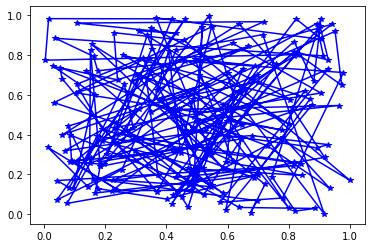

In [71]:
plotcities(x)

In [27]:
swapcities(cityXY)

array([[0.50595705, 0.89090325, 0.54721553, 0.14929401, 0.84071726,
        0.81428483, 0.92926362, 0.19659525, 0.61604468, 0.35165951,
        0.58526409, 0.91719366, 0.75720023, 0.38044585, 0.07585429,
        0.53079755, 0.93401068, 0.56882366, 0.01190207, 0.16218231,
        0.31121504, 0.16564873, 0.26297128, 0.6892145 , 0.4505416 ,
        0.22897697, 0.15237802, 0.53834244, 0.07817553, 0.10665277,
        0.00463422, 0.81730322, 0.08443585, 0.2598704 , 0.43141383,
        0.18184703, 0.14553898, 0.86929221, 0.5498602 , 0.85303112,
        0.35095238, 0.40180803, 0.23991615, 0.18390779, 0.41726707,
        0.90271611, 0.49086409, 0.33771941, 0.36924678, 0.78025207,
        0.24169129, 0.09645453, 0.94205059, 0.5752086 , 0.23477991,
        0.82119404, 0.0430238 , 0.64911547, 0.64774596, 0.54700889,
        0.74469281, 0.68677543, 0.3684846 , 0.78022744, 0.92938597,
        0.48679163, 0.44678375, 0.50850866, 0.81762771, 0.64431813,
        0.81158046, 0.3507271 , 0.87594281, 0.62